In [1]:
import pandas as pd
import numpy as np
import math
import sys
import seaborn
import matplotlib.pyplot as plt
# example of training a final classification model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from keras import callbacks
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras.models import load_model

C:\Users\administrator\anaconda3\envs\py3.7.1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\administrator\anaconda3\envs\py3.7.1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\administrator\anaconda3\envs\py3.7.1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\administrator\anaconda3\envs\py3.7

In [2]:
import tensorflow as tf
print( f'tensorflow_ver : {tf.__version__}')
import keras
print(f'keras_ver : {keras.__version__}')
import pandas
print(f'pandas_ver : {pandas.__version__}')
import sklearn
print(f'sklearn_ver : {sklearn.__version__}')
import sys
print( f'python_ver : {sys.version[0:5]}' )

tensorflow_ver : 1.14.0
keras_ver : 2.2.0
pandas_ver : 1.1.5
sklearn_ver : 0.22.2.post1
python_ver : 3.7.1


In [24]:
data_20s = pd.read_csv('data_mapping_20s_0112_change.csv')
data_30s = pd.read_csv('data_mapping_30s_0112_change.csv')
data_40s = pd.read_csv('data_mapping_40s_0112_change.csv')
data_50s = pd.read_csv('data_mapping_50s_0112_change.csv')
data_60s = pd.read_csv('data_mapping_60s_0112_change.csv')
data_70s = pd.read_csv('data_mapping_70s_0112_change.csv')
data_80s = pd.read_csv('data_mapping_80s_0112_change.csv')

In [25]:
data_full = data_20s.append(data_30s)
data_full = data_full.append(data_40s)
data_full = data_full.append(data_50s)
data_full = data_full.append(data_60s)
data_full = data_full.append(data_70s)
data_full = data_full.append(data_80s)

In [26]:
data_full = data_full.reset_index()
data_full=data_full[['HR','RR','HRV','SDNN','RMSSD','PNN50','gender','age','BP_HIGH','BP_LOW']]

In [27]:
data_full

,HR,RR,HRV,SDNN,RMSSD,PNN50,gender,age,BP_HIGH,BP_LOW
0,69,6,95,12.299774,17.031519,0.0001,0,21,140,80
1,66,8,72,12.299774,17.031519,0.0001,0,21,140,80
2,67,7,73,12.299774,17.031519,0.0001,0,21,140,80
3,66,8,66,12.299774,17.031519,0.0001,0,21,140,80
4,66,6,67,12.299774,17.031519,0.0001,0,21,140,80
...,...,...,...,...,...,...,...,...,...,...
347765,93,6,158,4.662018,6.302434,0.0001,1,84,130,90
347766,93,6,161,4.662018,6.302434,0.0001,1,84,130,90
347767,93,7,165,4.662018,6.302434,0.0001,1,84,130,90
347768,92,8,150,4.662018,6.302434,0.0001,1,84,130,90


In [28]:
data_full[data_full['SDNN']<1].index

Int64Index([   720,    721,    722,    723,    724,    725,    726,    727,
               728,    729,
            ...
            345600, 345601, 345602, 345603, 345604, 345605, 345606, 345607,
            345608, 345609],
           dtype='int64', length=50550)

In [29]:
del_index=[]
for i in range(0,len(data_full)):
    if data_full.loc[i,'SDNN']<1:
        del_index.append(i)

In [30]:
data_full = data_full.drop(index=del_index)
data_full = data_full.reset_index()
data_full=data_full[['HR','RR','HRV','SDNN','RMSSD','PNN50','gender','age','BP_HIGH','BP_LOW']]

In [31]:
data_full

,HR,RR,HRV,SDNN,RMSSD,PNN50,gender,age,BP_HIGH,BP_LOW
0,69,6,95,12.299774,17.031519,0.0001,0,21,140,80
1,66,8,72,12.299774,17.031519,0.0001,0,21,140,80
2,67,7,73,12.299774,17.031519,0.0001,0,21,140,80
3,66,8,66,12.299774,17.031519,0.0001,0,21,140,80
4,66,6,67,12.299774,17.031519,0.0001,0,21,140,80
...,...,...,...,...,...,...,...,...,...,...
297215,93,6,158,4.662018,6.302434,0.0001,1,84,130,90
297216,93,6,161,4.662018,6.302434,0.0001,1,84,130,90
297217,93,7,165,4.662018,6.302434,0.0001,1,84,130,90
297218,92,8,150,4.662018,6.302434,0.0001,1,84,130,90


In [32]:
data_full[data_full['BP_HIGH']>300].index

Int64Index([ 15380,  15381,  15382,  15383,  15384,  15385,  15386,  15387,
             15388,  15389,
            ...
            154610, 154611, 154612, 154613, 154614, 154615, 154616, 154617,
            154618, 154619],
           dtype='int64', length=900)

In [33]:
del_index=[]
for i in range(0,len(data_full)):
    if data_full.loc[i,'BP_HIGH']>300:
        del_index.append(i)

In [34]:
data_full = data_full.drop(index=del_index)
data_full = data_full.reset_index()
data_full=data_full[['HR','RR','HRV','SDNN','RMSSD','PNN50','gender','age','BP_HIGH','BP_LOW']]

In [35]:
data_full

,HR,RR,HRV,SDNN,RMSSD,PNN50,gender,age,BP_HIGH,BP_LOW
0,69,6,95,12.299774,17.031519,0.0001,0,21,140,80
1,66,8,72,12.299774,17.031519,0.0001,0,21,140,80
2,67,7,73,12.299774,17.031519,0.0001,0,21,140,80
3,66,8,66,12.299774,17.031519,0.0001,0,21,140,80
4,66,6,67,12.299774,17.031519,0.0001,0,21,140,80
...,...,...,...,...,...,...,...,...,...,...
296315,93,6,158,4.662018,6.302434,0.0001,1,84,130,90
296316,93,6,161,4.662018,6.302434,0.0001,1,84,130,90
296317,93,7,165,4.662018,6.302434,0.0001,1,84,130,90
296318,92,8,150,4.662018,6.302434,0.0001,1,84,130,90


In [36]:
raw = pd.read_csv('rawdata_chosun_2.csv')


In [37]:
raw

,SEQ,HR,RR,HRV,STATUS,SDNN,RMSSD,PNN50,gender,age,blood_sugar,BP_LOW,BP_HIGH
0,1,77,10,311,1,45.25,19.44,0.04950,0,63,125,84.0,129.0
1,1,77,10,311,1,45.25,19.44,0.04950,0,63,125,84.0,129.0
2,1,77,8,329,1,45.25,19.44,0.04950,0,63,125,84.0,129.0
3,1,77,8,329,1,45.25,19.44,0.04950,0,63,125,84.0,129.0
4,1,77,9,315,1,45.25,19.44,0.04950,0,63,125,84.0,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12003,902,73,10,285,1,25.47,3.57,0.00001,0,27,142,NaN,NaN
12004,902,73,10,281,1,25.47,3.57,0.00001,0,27,142,NaN,NaN
12005,902,73,10,281,1,25.47,3.57,0.00001,0,27,142,NaN,NaN
12006,902,73,10,281,1,25.47,3.57,0.00001,0,27,142,NaN,NaN


In [38]:
data_full = data_full.append(raw)

In [39]:
data_full=data_full[['HR','RR','HRV','SDNN','RMSSD','PNN50','gender','age','BP_HIGH','BP_LOW']]
data_full

,HR,RR,HRV,SDNN,RMSSD,PNN50,gender,age,BP_HIGH,BP_LOW
0,69,6,95,12.299774,17.031519,0.00010,0,21,140.0,80.0
1,66,8,72,12.299774,17.031519,0.00010,0,21,140.0,80.0
2,67,7,73,12.299774,17.031519,0.00010,0,21,140.0,80.0
3,66,8,66,12.299774,17.031519,0.00010,0,21,140.0,80.0
4,66,6,67,12.299774,17.031519,0.00010,0,21,140.0,80.0
...,...,...,...,...,...,...,...,...,...,...
12003,73,10,285,25.470000,3.570000,0.00001,0,27,NaN,NaN
12004,73,10,281,25.470000,3.570000,0.00001,0,27,NaN,NaN
12005,73,10,281,25.470000,3.570000,0.00001,0,27,NaN,NaN
12006,73,10,281,25.470000,3.570000,0.00001,0,27,NaN,NaN


In [40]:
data_full = data_full.dropna(axis=0)
data_full = data_full.reset_index()
data_full=data_full[['HR','RR','HRV','SDNN','RMSSD','PNN50','gender','age','BP_HIGH','BP_LOW']]
data_full

,HR,RR,HRV,SDNN,RMSSD,PNN50,gender,age,BP_HIGH,BP_LOW
0,69,6,95,12.299774,17.031519,0.00010,0,21,140.0,80.0
1,66,8,72,12.299774,17.031519,0.00010,0,21,140.0,80.0
2,67,7,73,12.299774,17.031519,0.00010,0,21,140.0,80.0
3,66,8,66,12.299774,17.031519,0.00010,0,21,140.0,80.0
4,66,6,67,12.299774,17.031519,0.00010,0,21,140.0,80.0
...,...,...,...,...,...,...,...,...,...,...
304825,62,8,5,49.700000,5.490000,0.00001,1,46,110.0,70.0
304826,62,8,5,49.700000,5.490000,0.00001,1,46,110.0,70.0
304827,62,8,5,49.700000,5.490000,0.00001,1,46,110.0,70.0
304828,62,8,6,49.700000,5.490000,0.00001,1,46,110.0,70.0


In [ ]:
=====================

In [20]:
data_full[data_full['BP_HIGH']>300].index

Int64Index([], dtype='int64')

In [21]:
del_index=[]
for i in range(0,len(data_full)):
    if data_full.loc[i,'BP_HIGH']>300:
        del_index.append(i)

In [41]:
data_full = data_full.drop(index=del_index)
data_full = data_full.reset_index()
data_full=data_full[['HR','RR','HRV','SDNN','RMSSD','PNN50','gender','age','BP_LOW']]
data_full

,HR,RR,HRV,SDNN,RMSSD,PNN50,gender,age,BP_LOW
0,69,6,95,12.299774,17.031519,0.00010,0,21,80.0
1,66,8,72,12.299774,17.031519,0.00010,0,21,80.0
2,67,7,73,12.299774,17.031519,0.00010,0,21,80.0
3,66,8,66,12.299774,17.031519,0.00010,0,21,80.0
4,66,6,67,12.299774,17.031519,0.00010,0,21,80.0
...,...,...,...,...,...,...,...,...,...
303925,62,8,5,49.700000,5.490000,0.00001,1,46,70.0
303926,62,8,5,49.700000,5.490000,0.00001,1,46,70.0
303927,62,8,5,49.700000,5.490000,0.00001,1,46,70.0
303928,62,8,6,49.700000,5.490000,0.00001,1,46,70.0


        HR  RR  HRV       SDNN      RMSSD    PNN50  gender  age
0       69   6   95  12.299774  17.031519  0.00010       0   21
1       66   8   72  12.299774  17.031519  0.00010       0   21
2       67   7   73  12.299774  17.031519  0.00010       0   21
3       66   8   66  12.299774  17.031519  0.00010       0   21
4       66   6   67  12.299774  17.031519  0.00010       0   21
...     ..  ..  ...        ...        ...      ...     ...  ...
303925  62   8    5  49.700000   5.490000  0.00001       1   46
303926  62   8    5  49.700000   5.490000  0.00001       1   46
303927  62   8    5  49.700000   5.490000  0.00001       1   46
303928  62   8    6  49.700000   5.490000  0.00001       1   46
303929  62   8    6  49.700000   5.490000  0.00001       1   46

[303930 rows x 8 columns]
(243144, 8)
(60786, 8)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 182358 samples, validate on 60786 samples
Epoch 1/200
1

182358/182358 [==============================] - 23s 129us/sample - loss: 157.9332 - acc: 0.0000e+00 - val_loss: 150.9844 - val_acc: 0.0000e+00
Epoch 46/200
182358/182358 [==============================] - 24s 132us/sample - loss: 157.6171 - acc: 0.0000e+00 - val_loss: 149.4527 - val_acc: 0.0000e+00
Epoch 47/200
182358/182358 [==============================] - 24s 133us/sample - loss: 156.9351 - acc: 0.0000e+00 - val_loss: 149.7356 - val_acc: 0.0000e+00
Epoch 48/200
182358/182358 [==============================] - 24s 132us/sample - loss: 156.7966 - acc: 0.0000e+00 - val_loss: 149.5616 - val_acc: 0.0000e+00
Epoch 49/200
182358/182358 [==============================] - 24s 133us/sample - loss: 157.2568 - acc: 0.0000e+00 - val_loss: 149.2475 - val_acc: 0.0000e+00
Epoch 50/200
182358/182358 [==============================] - 24s 133us/sample - loss: 156.5417 - acc: 0.0000e+00 - val_loss: 146.4876 - val_acc: 0.0000e+00
Epoch 51/200
182358/182358 [==============================] - 25s 135us

Epoch 149/200
182358/182358 [==============================] - 24s 131us/sample - loss: 134.8593 - acc: 0.0000e+00 - val_loss: 120.6337 - val_acc: 0.0000e+00
Epoch 150/200
182358/182358 [==============================] - 24s 131us/sample - loss: 135.0639 - acc: 0.0000e+00 - val_loss: 121.8211 - val_acc: 0.0000e+00
Epoch 151/200
182358/182358 [==============================] - 24s 132us/sample - loss: 134.1324 - acc: 0.0000e+00 - val_loss: 116.8576 - val_acc: 0.0000e+00
Epoch 152/200
182358/182358 [==============================] - 25s 137us/sample - loss: 135.1159 - acc: 0.0000e+00 - val_loss: 122.5201 - val_acc: 0.0000e+00
Epoch 153/200
182358/182358 [==============================] - 24s 132us/sample - loss: 134.3988 - acc: 0.0000e+00 - val_loss: 123.6482 - val_acc: 0.0000e+00
Epoch 154/200
182358/182358 [==============================] - 24s 132us/sample - loss: 134.2649 - acc: 0.0000e+00 - val_loss: 118.2971 - val_acc: 0.0000e+00
Epoch 155/200
182358/182358 [=======================

========Training Result=======
MAE:  7.21130350581892
MSE:  102.73932242233973
RMSE:  10.136040766608021
R2 score:  0.45193435918385316
=========Testing Result=======
MAE:  7.216121014094959
MSE:  102.25308520849788
RMSE:  10.112026760669588
R2 score:  0.4491031078532859
================== result random reference ================
================== result random reference ================
=========Testing Result=======
MAE:  7.212267007787909
MSE:  102.64207510489919
RMSE:  10.131242525223605
R2 score:  0.4513726872051004
================== result random reference 2000 ================
================== result random reference 2000 ================
=========Testing Result=======
MAE:  2.054065680438474
MSE:  8.869452803595841
RMSE:  2.9781626556647036
R2 score:  0.9155309795647631
[[69.99875 ]
 [70.3961  ]
 [69.008736]
 ...
 [69.33691 ]
 [69.334366]
 [69.334366]]
[[77.14835 ]
 [89.94772 ]
 [95.891754]
 ...
 [69.35794 ]
 [88.69419 ]
 [69.92323 ]]
RealSugar| 80 | PredictSugar| [77.14835

RealSugar| 70 | PredictSugar| [69.67576]
RealSugar| 86 | PredictSugar| [84.966286]
RealSugar| 70 | PredictSugar| [69.24893]
RealSugar| 92 | PredictSugar| [92.61384]
RealSugar| 70 | PredictSugar| [69.69403]
RealSugar| 92 | PredictSugar| [93.66345]
RealSugar| 75 | PredictSugar| [74.78589]
RealSugar| 70 | PredictSugar| [69.91981]
RealSugar| 88 | PredictSugar| [86.07431]
RealSugar| 97 | PredictSugar| [95.67992]
RealSugar| 90 | PredictSugar| [85.7039]
RealSugar| 70 | PredictSugar| [69.29519]
RealSugar| 70 | PredictSugar| [69.9781]
RealSugar| 80 | PredictSugar| [79.10301]
RealSugar| 60 | PredictSugar| [63.29617]
RealSugar| 80 | PredictSugar| [76.55011]
RealSugar| 78 | PredictSugar| [75.72913]
RealSugar| 70 | PredictSugar| [67.48848]
RealSugar| 78 | PredictSugar| [75.469124]
RealSugar| 73 | PredictSugar| [70.93921]
RealSugar| 67 | PredictSugar| [66.52008]
RealSugar| 90 | PredictSugar| [90.73746]
RealSugar| 70 | PredictSugar| [69.41144]
RealSugar| 78 | PredictSugar| [77.990524]
RealSugar| 92 |

RealSugar| 90 | PredictSugar| [89.71005]
RealSugar| 78 | PredictSugar| [79.79598]
RealSugar| 90 | PredictSugar| [90.53183]
RealSugar| 80 | PredictSugar| [78.23798]
RealSugar| 80 | PredictSugar| [78.171616]
RealSugar| 70 | PredictSugar| [68.807724]
RealSugar| 90 | PredictSugar| [79.96381]
RealSugar| 70 | PredictSugar| [69.664024]
RealSugar| 86 | PredictSugar| [88.90848]
RealSugar| 90 | PredictSugar| [83.96399]
RealSugar| 78 | PredictSugar| [78.21984]
RealSugar| 75 | PredictSugar| [75.58923]
RealSugar| 86 | PredictSugar| [83.84855]
RealSugar| 79 | PredictSugar| [80.98051]
RealSugar| 60 | PredictSugar| [63.849213]
RealSugar| 82 | PredictSugar| [81.8438]
RealSugar| 70 | PredictSugar| [77.28758]
RealSugar| 104 | PredictSugar| [96.3575]
RealSugar| 90 | PredictSugar| [90.53183]
RealSugar| 70 | PredictSugar| [69.67885]
RealSugar| 70 | PredictSugar| [67.17305]
RealSugar| 73 | PredictSugar| [68.665054]
RealSugar| 90 | PredictSugar| [90.17764]
RealSugar| 90 | PredictSugar| [89.196655]
RealSugar| 

RealSugar| 67 | PredictSugar| [70.30974]
RealSugar| 70 | PredictSugar| [66.881355]
RealSugar| 67 | PredictSugar| [69.06655]
RealSugar| 80 | PredictSugar| [78.081055]
RealSugar| 78 | PredictSugar| [78.939224]
RealSugar| 80 | PredictSugar| [78.6707]
RealSugar| 70 | PredictSugar| [69.70752]
RealSugar| 64 | PredictSugar| [64.642876]
RealSugar| 78 | PredictSugar| [81.50748]
RealSugar| 97 | PredictSugar| [95.68001]
RealSugar| 90 | PredictSugar| [87.37782]
RealSugar| 75 | PredictSugar| [74.86361]
RealSugar| 80 | PredictSugar| [75.21845]
RealSugar| 70 | PredictSugar| [69.10318]
RealSugar| 70 | PredictSugar| [69.66148]
RealSugar| 70 | PredictSugar| [69.8969]
RealSugar| 72 | PredictSugar| [71.91716]
RealSugar| 80 | PredictSugar| [76.78787]
RealSugar| 78 | PredictSugar| [77.975525]
RealSugar| 80 | PredictSugar| [79.52115]
RealSugar| 70 | PredictSugar| [70.71239]
RealSugar| 73 | PredictSugar| [69.418396]
RealSugar| 90 | PredictSugar| [89.974915]
RealSugar| 72 | PredictSugar| [74.13271]
RealSugar| 

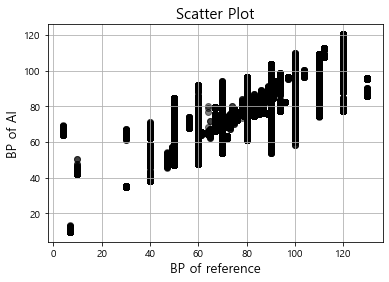

['BP_LOW_0113.bin']

In [42]:
# Reading the traing file
# df = pd.read_csv('../03. 개발 및 검증 데이터/BP_train_20210913.csv')
df = data_full
result_df = df
# 실제 데이터
# del df['age']
# del df['agegroup']
# del df['bloodcategory']
# del df['DM']

# Read the verification file
df1 = pd.read_csv('BP_test_20210913_low.csv')
result_df1 = df1
# del df1['age']
# del df1['agegroup']
# del df1['bloodcategory']
# del df1['DM']

# df2 = df[df['DM'] == 0]


df.columns
df


X = df.drop('BP_LOW',axis=1)
print(X)
y = df['BP_LOW']
print("==============================")

X1 = df.drop('BP_LOW',axis=1)
y1 = df['BP_LOW']

X2 = df1.drop('BP_LOW', axis=1)
y2 = df1['BP_LOW']




X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=30)


# input scaling
# scaler = RobustScaler()
# scaler = MinMaxScaler()
scaler = StandardScaler()
# StandardScaler standardization file SAVE!!!!
X_train.to_csv('BP_LOW_0113.csv')

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# scale 변환
X1 = scaler.transform(X1)

print(X_train.shape)
print(X_test.shape)






#  (20210717) 과적합을 해결하기 위해 
#  kernel_regularizer, activity_regularizer, Dropout 을 적용하였다
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_initializer='he_normal',bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.001)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(380, activation=tf.nn.relu, kernel_initializer='he_normal',bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.001)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(320, activation=tf.nn.relu, kernel_initializer='he_normal',bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.001)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)))
model.add(tf.keras.layers.Dense(192, activation=tf.nn.relu, kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu, kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)))
model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu, kernel_initializer='normal'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='zeros', activation='linear'))
# opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile( loss='mse',  optimizer=Adam(learning_rate=0.0005,beta_1=0.99), metrics=['accuracy'])


# fit model
history = model.fit(X_train, y_train.values, epochs=200, batch_size=40, validation_split = 0.25, verbose=1)


## Save the model to the computer - check the path
# Model 저장 
model.save('BP_LOW_0113.h5')


## plot setting 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)




def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 score: ', r2_square)
    elif not train:
        print("=========Testing Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 score: ', r2_square)



y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training file scaler application(X1 predict )
y1_predict = model.predict(X1)


# Apply test file scaler(X2 predict)
X2 = scaler.transform(X2)
y2_predict = model.predict(X2)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

print("================== result random reference ================")
print("================== result random reference ================")
print_evaluate(y1, y1_predict, train=False)

print("================== result random reference 2000 ================")
print("================== result random reference 2000 ================")
print_evaluate(y2, y2_predict, train=False)


result_df['predict_result'] = y1_predict
result_df.to_csv(r"result_tr_01.csv")
print(y1_predict)

result_df1['predict_result'] = y2_predict
result_df1.to_csv(r"result1_vd_01.csv")
print(y2_predict)


#======================================================
# Comparison of predicted and actual values
testY2_predict = model.predict(X2)
for i in range(len(testY2_predict)):
    label = y2[i]
    prediction = testY2_predict[i]
    print('RealSugar| {:} | PredictSugar| {:}'.format(label, prediction))
#======================================================



# ====================Scatter Plot==================
# draw scatter plot
plt.title("Scatter Plot", fontsize=15)
plt.scatter(y1, y1_predict, color='black', alpha=.5)
plt.xlabel("BP of reference", fontsize=13)
plt.ylabel("BP of AI", fontsize=13)
plt.grid()
plt.show()
# ====================Scatter Plot==================



import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from joblib import dump, load


dump(scaler, 'BP_LOW_0113.bin', compress=True)

In [5]:
def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 score: ', r2_square)
    elif not train:
        print("=========Testing Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 score: ', r2_square)





# ### Import data with StandardScaler standardization work
dm_standard_df = pd.read_csv( 'BloodPressure_high(ver1.3)_0930_01.csv' )
# print(dm_standard_df)
standard_result_df = dm_standard_df
standardX = dm_standard_df.drop( ['BP'], axis = 1 )
# print(standardX)


# Read the verification file
test_df = pd.read_csv( '../04. 분석용 데이터/output_0929_26_2m.csv' )
print(test_df)
test_result_df = test_df

# DM =diabetes class
print('=======test_df======')
print(test_df.info())

# Cloumns Separation of  validation data
testX2 = test_df.drop( ['BP'], axis = 1 )
testy2 = test_df['BP']

print("==============================")


## Save the model to the computer - check the path
model = load_model('BloodPressure_high(ver1.3)_0930_01.h5')


# Source code that is actually applied
# realtest  predict
# Read and apply actual application data here!
# !!!!!!!!!!!do not change!.!!!!!!!!!!!
# StandardScaler standardization work
scaler = StandardScaler()
X_stand= scaler.fit_transform(standardX)


# Applying StandardScaler here!
testX2 = scaler.transform(testX2)
print('======testy_predict======')
print(testX2)
testy2_predict = model.predict(testX2 )
print('======testy_predict======')

# evaluate act model
print("============ evaluate result real  ==========")
print_evaluate(testy2, testy2_predict, train=True)

#======================================================
# Comparison of predicted and actual values
cnt_diff_0 = 0
cnt_diff_1 = 0
cnt_diff_2 = 0
cnt_diff_5 = 0
cnt_diff_10 = 0
index_ = []
prediction_list = []

testy2_predict = model.predict(testX2)
for i in range(len(testy2_predict)):
    label = testy2[i]
    prediction = math.floor(testy2_predict[i])
    prediction_list.append(prediction)
    diff_val = abs(prediction-label).round(2)
    #print('{:}. RealSugar| {:} | PredictSugar| {:} | 차이값 | {:}'.format(i, label, prediction, diff_val ))
    diff_val = abs(prediction-label).round(0)
    if diff_val > 10 :
        cnt_diff_10 += 1
        index_.append(i)
    elif diff_val > 5 :
        cnt_diff_5 += 1
    elif diff_val > 2 :
        cnt_diff_2 += 1
    elif diff_val > 0 :
        cnt_diff_1 += 1
    elif diff_val == 0 :
        cnt_diff_0 += 1
#======================================================
print('='*25)
print( f'검증 데이터 개수 : {len(testy2_predict)}' )
print( f'차이 없음 : {cnt_diff_0}' )
print('='*25)
print( f'0이상 차이나는 값들 : {cnt_diff_1}' )
print( f'2이상 차이나는 값들 : {cnt_diff_2}' )
print( f'5이상 차이나는 값들 : {cnt_diff_5}' )
print( f'10이상 차이나는 값들 : {cnt_diff_10}' )
#print( f'10차이 인덱스 : {index_}' )
print('총 데이터 결과의 평균 == RealBP| {:} | PredictBP| {:}'.format(label, sum(prediction_list)/len(prediction_list)))



     HR  RR  HRV       SDNN      RMSSD     PNN50  gender  age   BP
0    93   9   32  23.929527  19.303137  0.038889       0   26  124
1    92   7   23  23.929527  19.303137  0.038889       0   26  124
2    92   7   23  23.929527  19.303137  0.038889       0   26  124
3    91   7   18  23.929527  19.303137  0.038889       0   26  124
4    88   7  108  23.929527  19.303137  0.038889       0   26  124
..   ..  ..  ...        ...        ...       ...     ...  ...  ...
115  71  17  105  23.929527  19.303137  0.038889       0   26  124
116  70  16   58  23.929527  19.303137  0.038889       0   26  124
117  69  16   76  23.929527  19.303137  0.038889       0   26  124
118  68  15   72  23.929527  19.303137  0.038889       0   26  124
119  68  15   59  23.929527  19.303137  0.038889       0   26  124

[120 rows x 9 columns]
=======test_df======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  -----

======testy_predict======
============ evaluate result real  ==========
========Training Result=======
MAE:  0.26498273213704426
MSE:  0.1409838115030046
RMSE:  0.37547811055107405
R2 score:  0.0
검증 데이터 개수 : 120
차이 없음 : 11
0이상 차이나는 값들 : 109
2이상 차이나는 값들 : 0
5이상 차이나는 값들 : 0
10이상 차이나는 값들 : 0
총 데이터 결과의 평균 == RealBP| 124 | PredictBP| 123.08333333333333


In [81]:
#=========================================
# import matplotlib.pyplot as plt


def clarke_error_grid(ref_values, pred_values, title_string):
    #Checking to see if the lengths of the reference and prediction arrays are the same
    assert (len(ref_values) == len(pred_values)), "Unequal number of values (reference : {}) (prediction : {}).". format(len(ref_values), len(pred_values))
    #Checks to see if the values are within the normal physiological range, otherwise it gives a warning
    if max(ref_values) > 400 or max(pred_values) > 400:
        print ("Input Warning: the maximum reference value {} or the maximum prediction value {} exceeds the normal physiological range of glucose (<400 mg/dl).".format(max(ref_values), max(pred_values)))
    if min(ref_values) < 0 or min(pred_values) < 0:
        print ("Input Warning: the minimum reference value {} or the minimum prediction value {} is less than 0 mg/dl.".format(min(ref_values),  min(pred_values)))
    #Clear plot
    plt.clf()
    #Set up plot
    plt.scatter(ref_values, pred_values, marker='o', color='black', s=8)
    plt.title(title_string + " Clarke Error Grid")
    plt.xlabel("Reference Concentration (mg/dl)")
    plt.ylabel("Prediction Concentration (mg/dl)")
    plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    plt.gca().set_facecolor('white')
    #Set axes lengths
    plt.gca().set_xlim([0, 400])
    plt.gca().set_ylim([0, 400])
    plt.gca().set_aspect((400)/(400))
    #Plot zone lines
    plt.plot([0,400], [0,400], ':', c='black')                      #Theoretical 45 regression line
    plt.plot([0, 175/3], [70, 70], '-', c='black')
    #plt.plot([175/3, 320], [70, 400], '-', c='black')
    plt.plot([175/3, 400/1.2], [70, 400], '-', c='black')           #Replace 320 with 400/1.2 because 100*(400 - 400/1.2)/(400/1.2) =  20% error
    plt.plot([70, 70], [84, 400],'-', c='black')
    plt.plot([0, 70], [180, 180], '-', c='black')
    plt.plot([70, 290],[180, 400],'-', c='black')
    # plt.plot([70, 70], [0, 175/3], '-', c='black')
    plt.plot([70, 70], [0, 56], '-', c='black')                     #Replace 175.3 with 56 because 100*abs(56-70)/70) = 20% error
    # plt.plot([70, 400],[175/3, 320],'-', c='black')
    plt.plot([70, 400], [56, 320],'-', c='black')
    plt.plot([180, 180], [0, 70], '-', c='black')
    plt.plot([180, 400], [70, 70], '-', c='black')
    plt.plot([240, 240], [70, 180],'-', c='black')
    plt.plot([240, 400], [180, 180], '-', c='black')
    plt.plot([130, 180], [0, 70], '-', c='black')
    #Add zone titles
    plt.text(30, 15, "A", fontsize=15)
    plt.text(370, 260, "B", fontsize=15)
    plt.text(280, 370, "B", fontsize=15)
    plt.text(160, 370, "C", fontsize=15)
    plt.text(160, 15, "C", fontsize=15)
    plt.text(30, 140, "D", fontsize=15)
    plt.text(370, 120, "D", fontsize=15)
    plt.text(30, 370, "E", fontsize=15)
    plt.text(370, 15, "E", fontsize=15)

    #Statistics from the data
    zone = [0] * 5
    for i in range(len(ref_values)):
        if (ref_values[i] <= 70 and pred_values[i] <= 70) or (pred_values[i] <= 1.2*ref_values[i] and pred_values[i] >= 0.8*ref_values[i]):
            zone[0] += 1    #Zone A
        elif (ref_values[i] >= 180 and pred_values[i] <= 70) or (ref_values[i] <= 70 and pred_values[i] >= 180):
            zone[4] += 1    #Zone E
        elif ((ref_values[i] >= 70 and ref_values[i] <= 290) and pred_values[i] >= ref_values[i] + 110) or ((ref_values[i] >= 130 and ref_values[i] <= 180) and (pred_values[i] <= (7/5)*ref_values[i] - 182)):
            zone[2] += 1    #Zone C
        elif (ref_values[i] >= 240 and (pred_values[i] >= 70 and pred_values[i] <= 180)) or (ref_values[i] <= 175/3 and pred_values[i] <= 180 and pred_values[i] >= 70) or ((ref_values[i] >= 175/3 and ref_values[i] <= 70) and pred_values[i] >= (6/5)*ref_values[i]):
            zone[3] += 1    #Zone D
        else:
            zone[1] += 1    #Zone B
    return plt, zone

In [82]:
#=========================================
# function parameter
#  def clarke_error_grid(ref_values, pred_values, title_string): 
#========================================== 
print('=======clarke_error_grid region data ======')
plt, zone = clarke_error_grid(testy2, testy2_predict, 'Blood Pressure Validation')
print(zone)
plt.show()

=======clarke_error_grid region data ======


NameError: name 'testy2' is not defined